In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import ppscore as pps

In [182]:
important_columns = ['DEPRESSIONINDEX', 'DEPEPISODE', 'MDELASTYR', 'ANYTXRXMDE', 'CATAG3', 'CATAG7', 'IRSEX', 
    'NEWRACE2', 'ANYINDEX', 'MJANDCOKE', 'ILLICITDRUGUSE', 'LSYRILLICIT', 
    'COKECRACK', 'OTHERILLICIT', 'MARJLTYR', 'MJCOKELY', 'COCCRKLY', 
    'MJGT12MO', 'COCGT12MO', 'ANYGT12MO', 'ALCFMFPB', 'IREDUC2', 'EDU_DUMMY', 
    'INCOME', 'INCOME_R', 'POVERTY', 'IRPRVHLT', 'WORKFORCE', 'EMPSTAT4', 
    'MOVESPY2', 'CACHAR', 'CATYPE', 'CRIMEHIST', 'ANYSDRUG', 'ANYATTACK', 
    'ANYTHEFT', 'NUMARREST', 'HEALTH2', 'SCHDSICK', 'SCHDSKIP', 'TXLCAD', 'DSTNCALM', 'DSTTIRE', 'DSTSITST', 'DSTDEPRS', 'DSTCHEER', 'DSTNRVOS', 'YOWRSATP', 'YOWRSPLN', 'ADWRDLOT', 'ADWRSTHK', 'YO_MDEA4', 'ADWRSLEP', 'ADWRSMOR', 'YO_MDEA3', 'ADWRELES', 'IRMARIT', 'NOMARR2', 'RKIDSHH', 'MARRIED', 'CHILDRENINHOME']

In [183]:
df = pd.read_csv('./data/27521-0001-Data.tsv', sep='\t')
df = df[important_columns]

In [184]:
# DEPEPISODE: -1 (Missing) Categorical
# MDELASTYR: -1 (Missing) Categorical
# ANYTXRXMDE: -9 (Missing) Categorical
# CATAG3: Categorical
# CATAG7: Categorical
# IRSEX: Categorical
# NEWRACE2: Categorical
# ANYINDEX: -1 (Missing) Numeric
# MJANDCOKE: Categorical
# ILLICITDRUGUSE: Categorical
# LSYRILLICIT: Categorical
# COKECRACK: -1 (Missing) Categorical
# OTHERILLICIT Categorical
# MARJLTYR Categorical
# MJCOKELY Categorical
# COCCRKLY Categorical
# MJGT12MO -9 (Missing) Categorical
# COCGT12MO -9 (Missing) Categorical
# ANYGT12MO -9 (Missing) Categorical
# ALCFMFPB 94, 97, 98 (Missing) Categorical
# IREDUC2 Categorical
# EDU_DUMMY Categorical
# INCOME Categorical
# INCOME_R Categorical
# POVERTY Categorical
# IRPRVHLT Categorical
# WORKFORCE -1 (Missing) Categorical
# EMPSTAT4: 99 (Missing) Categorical
# MOVESPY2: 994, 997, 998 (Missing) Categorical
# CACHAR: -9 (Missing) Categorical
# CATYPE: -9 (Missing) Categorical
# CRIMEHIST: -9 (Missing) Categorical
# ANYSDRUG: -1 (Missing) Categorical
# ANYATTACK: -1 (Missing) Categorical
# ANYTHEFT: -1 (Missing) Categorical
# NUMARREST: -9 (Missing) Categorical
# HEALTH2: -9 (Missing) Categorical
# SCHDSICK: 89, 90, 94, 97, 98, 99 (Missing) numeric
# SCHDSKIP 89, 94, 97, 98, 99 (Missing) numeric
# TXLCAD -1 (Missing) Categorical
# DSTNCALM 94, 97, 98, 99 (Missing) Categorical
# DSTTIRE 89, 94, 97, 98, 99 (Missing) Categorical
# DSTSITST 94, 97, 98, 99 (Missing) Categorical
# DSTDEPRS 89, 94, 97, 98, 99 (Missing) Categorical
# DSTCHEER 85, 94, 97, 98, 99 (Missing) Categorical
# DSTNRVOS 85, 89, 94, 97, 98, 99 (Missing) Categorical
# YOWRSATP 94, 97, 98, 99 (Legitimate skip) (Missing) Categorical
# YOWRSPLN 94, 97, 98, 99 (Legitimate skip) (Missing) Categorical
# ADWRDLOT 94, 97, 98, 99 (Legitimate skip) (Missing) Categorical
# ADWRSTHK 94, 97, 98, 99 (Legitimate skip) (Missing) Categorical
# YO_MDEA4 94, 97, 98, 99 (Legitimate skip) (Missing) Categorical
# ADWRSLEP 94, 97, 98, 99 (Legitimate skip) (Missing) Categorical
# ADWRSMOR 94, 97, 98, 99 (Legitimate skip) (Missing) Categorical
# YO_MDEA3 94, 97, 98, 99 (Legitimate skip) (Missing) Categorical
# ADWRELES 94, 97, 98, 99 (Legitimate skip) (Missing) Categorical
# IRMARIT 99 (Missing) Categorical
# NOMARR2 94. 97, 99 (Missing) Categorical
# RKIDSHH -1 (Missing) Categorical
# MARRIED Categorical
# CHILDRENINHOME Categorical

Podstawowe czyszczenie danych:

In [185]:

df = df[df['DEPRESSIONINDEX'] != -9]

In [186]:

import numpy as np

missing_values = [-1, -9, 89, 94, 97, 98, 99, 994, 997, 998]

for missing_val in missing_values:
    df = df.replace(missing_val, np.nan)

# Calculate the percentage of missing values for each column
missing_percentage = df.isna().mean() * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# Display the percentage of missing values for each column
print(missing_percentage_sorted)

columns_with_missing_values = missing_percentage[missing_percentage > 40].index
df = df.drop(columns_with_missing_values, axis=1)

columns_with_missing = missing_percentage[missing_percentage > 0].index

DSTNCALM           100.000000
DSTSITST           100.000000
DSTDEPRS           100.000000
DSTTIRE            100.000000
TXLCAD              98.336579
ADWRSMOR            98.274370
YOWRSATP            96.121389
YOWRSPLN            96.105161
YO_MDEA3            92.194093
YO_MDEA4            92.158931
ADWRELES            90.595586
ADWRSLEP            90.565834
ADWRSTHK            90.565834
ADWRDLOT            90.557719
NOMARR2             74.688954
SCHDSKIP            50.108190
DSTNRVOS            49.880991
DSTCHEER            49.813372
EMPSTAT4            49.480688
SCHDSICK            42.275235
IRMARIT             24.880991
ANYGT12MO            5.496051
MJGT12MO             4.381694
COKECRACK            2.534350
NUMARREST            1.695878
COCGT12MO            1.414584
MDELASTYR            1.190090
DEPEPISODE           1.052148
ALCFMFPB             1.022395
ANYTXRXMDE           0.900682
ANYSDRUG             0.311046
CRIMEHIST            0.267770
ANYTHEFT             0.243427
CATYPE    

In [187]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [188]:
df_without_depression = df.loc[df['DEPRESSIONINDEX'] == 0]
df_with_depression = df.loc[df['DEPRESSIONINDEX'] != 0]

missing_percentage_without_depression = (1 - df_without_depression.isna().mean()) * 100
missing_percentage_with_depression_sorted = missing_percentage_without_depression.sort_values(ascending=False)

missing_percentage_with_depression = (1 - df_with_depression.isna().mean()) * 100
missing_percentage_with_depression_sorted = missing_percentage_with_depression.sort_values(ascending=False)

summary = pd.DataFrame({
    'Without Depression': missing_percentage_without_depression,
    'With Depression': missing_percentage_with_depression,
    'Diff': missing_percentage_without_depression - missing_percentage_with_depression
})

# columns_to_delete = summary[summary['Diff'].abs() > 10].index.to_list()
columns_to_delete = []

df = df.drop(columns=columns_to_delete)

Mozna zauwazyć, ze procent brakujących danych jest w ogólności mały, nie licząc dwóch kolumn - SCHDSICK oraz SCHDSKIP. Dlatego usuwamy te kolumny. Dla pozostałych wartości po prostu usuwamy odpowiednie wiersze.

In [189]:
from sklearn.impute import KNNImputer

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the training data
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

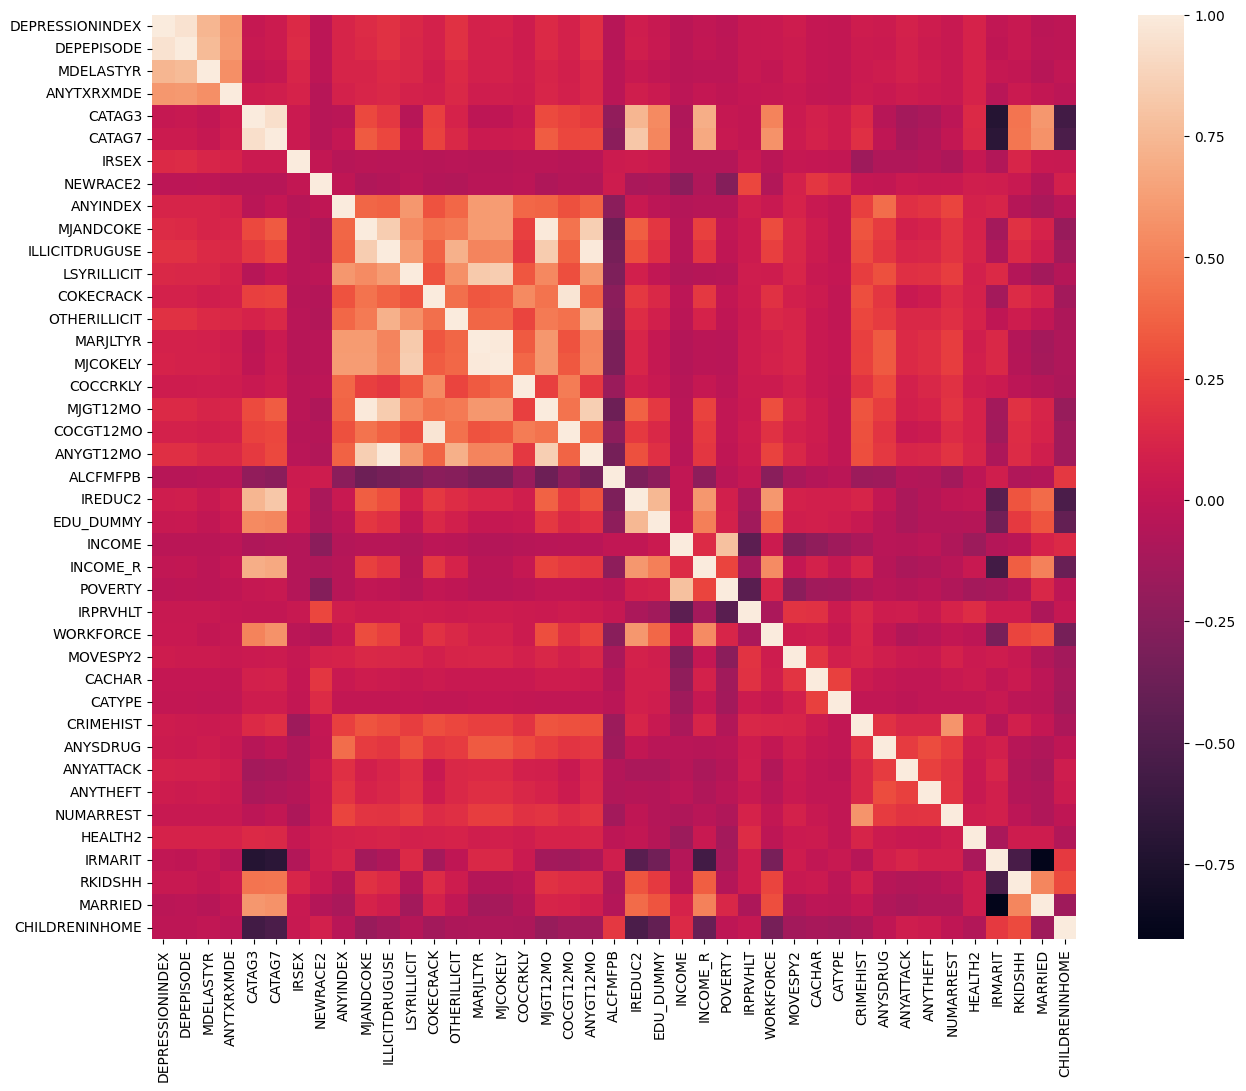

In [190]:
corrmat = df.corr(method='spearman')
# corrmat = corrmat[abs(corrmat['DEPRESSIONINDEX']) > 0.7]
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, square=True, vmax=1.0)
plt.show()

DEPRESSIONINDEX    1.000000
DEPEPISODE         0.949602
MDELASTYR          0.732629
ANYTXRXMDE         0.593720
OTHERILLICIT       0.177845
ILLICITDRUGUSE     0.177730
ANYGT12MO          0.173263
MJANDCOKE          0.144724
IRSEX              0.140869
MJGT12MO           0.140359
LSYRILLICIT        0.132218
Name: DEPRESSIONINDEX, dtype: float64


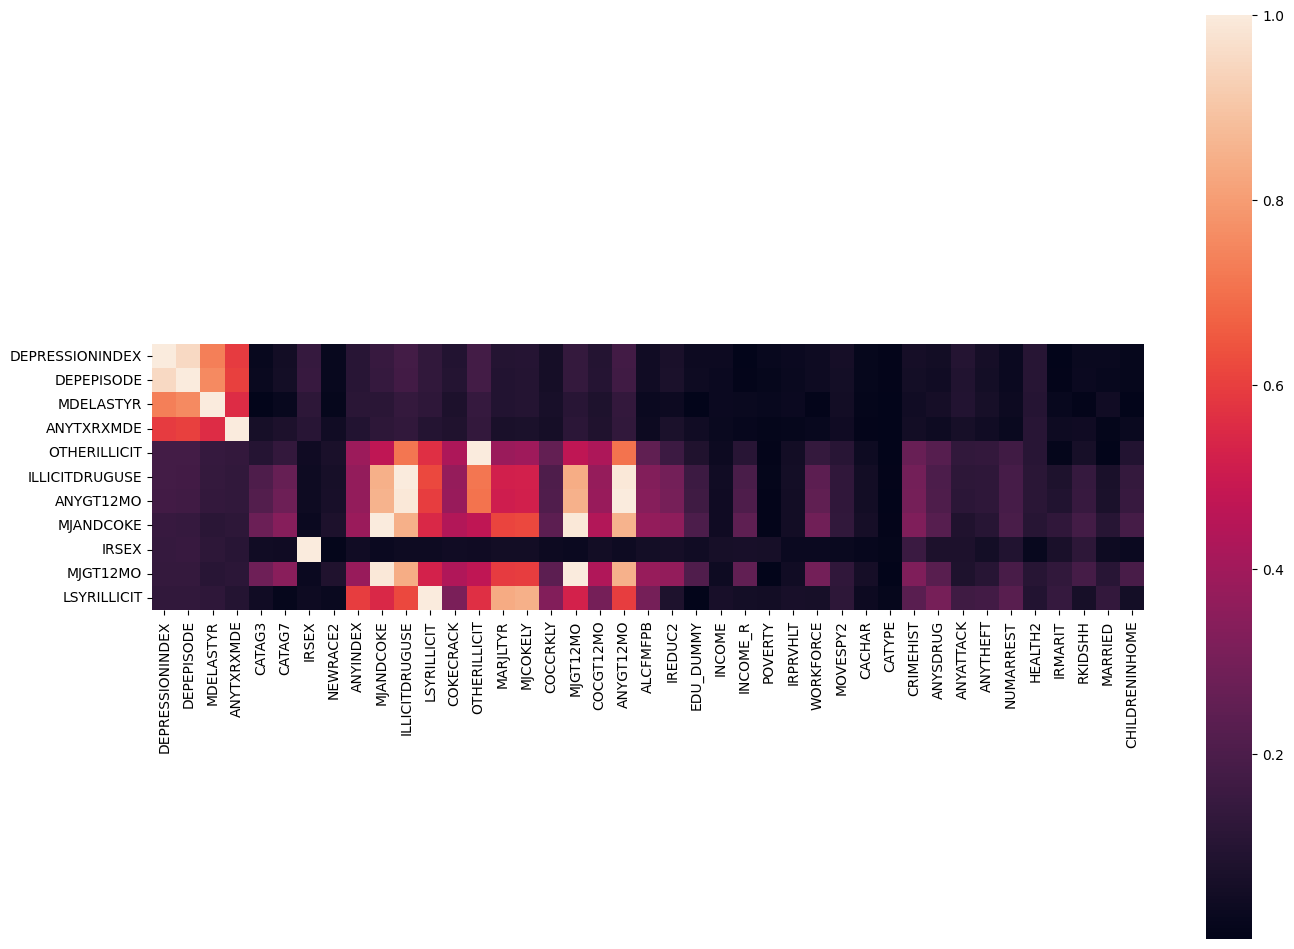

In [191]:
corrmat = corrmat.abs().sort_values(by='DEPRESSIONINDEX', ascending=False).head(11)
print(corrmat['DEPRESSIONINDEX'])
# corrmat = corrmat['DEPRESSIONINDEX']
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, square=True)
plt.show()

In [192]:
# Lista kolumn, które mają pozostać bez zmian
columns_to_change_to_string = ['DEPRESSIONINDEX', 'DEPEPISODE', 'MDELASTYR', 'ANYTXRXMDE', 'CATAG3', 'CATAG7', 'IRSEX', 'NEWRACE2', 'MJANDCOKE', 'ILLICITDRUGUSE', 'LSYRILLICIT', 'COKECRACK', 'OTHERILLICIT', 'MARJLTYR', 'MJCOKELY', 'COCCRKLY', 'MJGT12MO', 'COCGT12MO', 'ANYGT12MO', 'ALCFMFPB', 'IREDUC2', 'EDU_DUMMY', 'INCOME', 'INCOME_R', 'POVERTY', 'IRPRVHLT', 'WORKFORCE', 'EMPSTAT4', 'MOVESPY2', 'CACHAR', 'CATYPE', 'CRIMEHIST', 'ANYSDRUG', 'ANYATTACK', 'ANYTHEFT', 'NUMARREST', 'HEALTH2']

# Zamiana kolumn na string, oprócz wybranych
df_pps = df.apply(lambda x: x.astype(float) if x.name not in columns_to_change_to_string else x.astype(str))


In [193]:
pps_matrix = pps.matrix(df_pps)

sorted_pps = pps_matrix[(pps_matrix['x'] == 'DEPRESSIONINDEX')].sort_values(by='ppscore', ascending=False)

column_names = sorted_pps.iloc[2:8]['y'].tolist()
column_names

/Users/patryk/coding/python/EAD_project_2/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/patryk/coding/python/EAD_project_2/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/patryk/coding/python/EAD_project_2/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/patryk/coding/python/EAD_project_2/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/patryk/coding/python/EAD_project_2/.venv/lib/python3.11/site-packages/sklearn/mod

['MDELASTYR',
 'ANYTXRXMDE',
 'OTHERILLICIT',
 'ILLICITDRUGUSE',
 'ANYGT12MO',
 'MJANDCOKE']

In [194]:
from scipy.stats import f_oneway

# Podział danych na grupy wiekowe
groups = df.groupby('CATAG3')[column_names]

# Test ANOVA dla każdego czynnika
for factor in column_names:
    group_data = [group[factor].dropna() for _, group in groups]
    f_stat, p_value = f_oneway(*group_data)
    print(f"ANOVA dla {factor}: F-stat={f_stat:.2f}, p-value={p_value:.4f}")

ANOVA dla MDELASTYR: F-stat=15.52, p-value=0.0000
ANOVA dla ANYTXRXMDE: F-stat=51.12, p-value=0.0000
ANOVA dla OTHERILLICIT: F-stat=351.34, p-value=0.0000
ANOVA dla ILLICITDRUGUSE: F-stat=929.25, p-value=0.0000
ANOVA dla ANYGT12MO: F-stat=998.85, p-value=0.0000
ANOVA dla MJANDCOKE: F-stat=1403.15, p-value=0.0000


In [195]:
y = df['DEPRESSIONINDEX']
X = df[column_names]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
X.isna().sum()

MDELASTYR         0
ANYTXRXMDE        0
OTHERILLICIT      0
ILLICITDRUGUSE    0
ANYGT12MO         0
MJANDCOKE         0
dtype: int64

In [197]:
import statsmodels.api as sm

# Add a constant to the independent variables matrix
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)

Y_train_ols = Y_train.copy()
Y_test_ols = Y_test.copy()

Y_train_ols[Y_train_ols > 0] = 1
Y_test_ols[Y_test_ols > 0] = 1

# Train the OLS model
model = sm.OLS(Y_train_ols, X_train_ols).fit()

# Print the model summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:        DEPRESSIONINDEX   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     5912.
Date:                Sun, 26 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:38:10   Log-Likelihood:                -1850.0
No. Observations:               29577   AIC:                             3714.
Df Residuals:                   29570   BIC:                             3772.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0620      0.002     30.

7395
7395


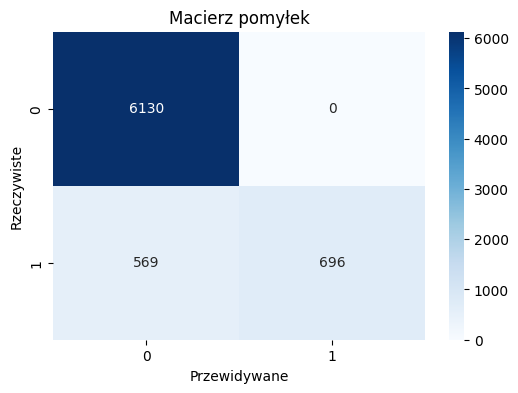

In [198]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import roc_curve

y_pred = model.predict(X_test_ols)
print(len(y_pred))

y_pred = pd.cut(y_pred, bins=2, labels=np.arange(0, 2))
print(len(y_pred))

conff = cm(Y_test_ols, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conff, annot=True, fmt='d', cmap='Blues', xticklabels=np.linspace(0, 1, 2, dtype=np.uint8), yticklabels=np.linspace(0, 1, 2, dtype=np.uint8))
plt.title('Macierz pomyłek')
plt.xlabel('Przewidywane')
plt.ylabel('Rzeczywiste')
plt.show()

y_pred_binar = y_pred.copy()

In [199]:
Y_train_ols = Y_train.copy()
Y_test_ols = Y_test.copy()

Y_train_ols = Y_train_ols[Y_train_ols > 0]
Y_test_ols = Y_test_ols[Y_test_ols > 0]

X_train_ols = X_train.loc[Y_train_ols.index]
X_test_ols = X_test.loc[Y_test_ols.index]

X_test_ols_index = X_test_ols.copy()

X_train_ols = sm.add_constant(X_train_ols)
X_test_ols = sm.add_constant(X_test_ols)


model = sm.OLS(Y_train_ols, X_train_ols).fit()


1265
1265


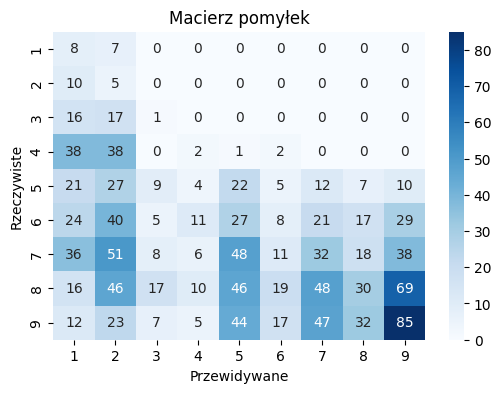

In [200]:
y_pred = model.predict(X_test_ols)

print(len(y_pred))

y_pred = pd.cut(y_pred, bins=9, labels=np.arange(1, 10))
print(len(y_pred))

conff = cm(Y_test_ols, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conff, annot=True, fmt='d', cmap='Blues', xticklabels=np.linspace(1, 9, 9, dtype=np.uint8), yticklabels=np.linspace(1, 9, 9, dtype=np.uint8))
plt.title('Macierz pomyłek')
plt.xlabel('Przewidywane')
plt.ylabel('Rzeczywiste')
plt.show()